In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import igraph

(1050, 20) shape of output array X. (1050,) shape of output y
(1050, 20) (1050,)
[[149.           0.        ]
 [274.32405578  78.37114437]
 [280.10137512 -72.5986095 ]]


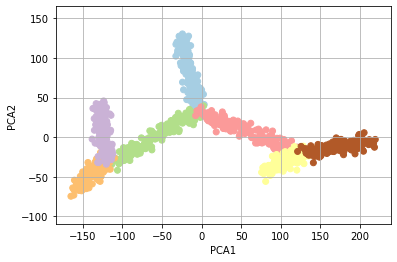

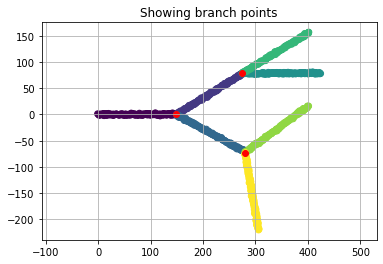

In [2]:
from sklearn.decomposition import  PCA

try:
    import umap 
except:
    print('cannot import umap - do not use plot_mode = "umap"')

def make_multi_level_fork(n_teeth = 2, len_tooth=100,
        n_components = 2, n_levels_of_branching = 2, inertia_coef = 0, 
        sigma_noise = 10.0,  teeth_start_distance = 0,  plot_mode = 'PCA',
        step_from_previous_branch = 0 , return_X_y = True ): 
  '''
  Returns numpy array containing image for multi-teeth fork,
  its shape is (len_tooth*(n_teeth+1) , 2  ) , 
  output y  - contains labels, which is teath number and zero for base of the fork
  
  @examples
  X = make_multi_level_fork()
  X = makemake_multi_level_fork_fork(n_teeth = 3, plot_mode = 'PCA' )
  '''

  """
  n_components = 5
  n_levels_of_branching = 2
  inertia_coef = 0
  n_teeth = 2
  len_tooth=100 
  tangent_step_between_teeth = 1 
  sigma_noise = 20.0
  teeth_start_distance = 0  
  plot_mode = 'PCA'
  """

  ## Prepare output variable - it is outputed if return_X_y = False and dicitionary is returned
  list_branch_points = []

  ################################################################################################
  # Prepare the "hand of fork" - the first branch which goes i*(1,0,0...0)+noise
  ################################################################################################
  current_label = 0
  n = len_tooth
  X = sigma_noise* np.random.randn(n, n_components) #np.zeros((n,n_components))
  X[:,0] = X[:,0] + np.arange(n)
  y = np.ones(n) * current_label
  current_label += 1
  X_final = X.copy()
  y_final = y.copy()

  ################################################################################################
  # Intialize "previous step" datum for main loop
  ################################################################################################
  last_point_of_previous_branch = np.zeros(n_components)
  last_point_of_previous_branch[0] = n-1  
  list_branch_points.append( last_point_of_previous_branch   )
  direction_vector = np.zeros(n_components)
  direction_vector[0] = 1

  list_last_point_of_previous_branch = []
  list_last_point_of_previous_branch.append( last_point_of_previous_branch  )
  list_previous_direction_vector = []
  list_previous_direction_vector.append( direction_vector  )

  new_list_last_point_of_previous_branch = [] 
  new_list_previous_direction_vector = []

  ################################################################################################
  # Main loop
  ################################################################################################
  for current_level in range(1,n_levels_of_branching):
    for i,last_point_of_previous_branch in enumerate(list_last_point_of_previous_branch):
      previous_direction_vector = list_previous_direction_vector[i]
      for teeth in range( int(n_teeth) ):# range( int(n_teeth/2)+1):
        v = np.random.randn(n_components)
        v = v / np.sqrt( np.sum(v**2) ) # Normilize
        v = v + inertia_coef*previous_direction_vector
        v = v / np.sqrt( np.sum(v**2) ) # Normilize

        X = np.zeros( (n, n_components) )
        X[0,:] = last_point_of_previous_branch + v + v*step_from_previous_branch
        for i in range(1, X.shape[0]):
          X[i,:] += X[i-1,:] + v

        new_list_last_point_of_previous_branch.append(  X[n-1, :] )
        if current_level < n_levels_of_branching - 1: # Last level is end , not branching
          list_branch_points.append( X[n-1, :]   )
        new_list_previous_direction_vector.append(v)

        X += sigma_noise* np.random.randn(n, n_components) #np.zeros((n,n_components))
        y = np.ones(n) * current_label
        current_label += 1

        X_final = np.concatenate((X_final,X), axis = 0)
        y_final = np.concatenate( (y_final, y) )

    list_last_point_of_previous_branch = new_list_last_point_of_previous_branch.copy() # n_levels_of_branching
    new_list_last_point_of_previous_branch = []
    list_previous_direction_vector = new_list_previous_direction_vector.copy()
    new_list_previous_direction_vector = []

  X = X_final
  y = y_final

  ################################################################################################
  # Plotters
  ################################################################################################
  if isinstance(plot_mode, str) and (plot_mode.lower() in ['pca'] ):
    try:
      from sklearn.decomposition import  PCA
      r = PCA().fit_transform(X)
      print(X.shape,'shape of output array X.', y.shape, 'shape of output y' )
      plt.scatter(r[:,0],r[:,1], c = y, cmap= plt.cm.Paired )  # cmp = 'viridis'
      plt.axis("equal")
      plt.xlabel('PCA1')
      plt.ylabel('PCA2')
      plt.grid()
      #plt.show()
    except:
      print('Exception - cannot plot PCA')
  elif isinstance(plot_mode, str) and (plot_mode.lower() in ['first_two_components'] ):
    print(X.shape,'shape of output array X.', y.shape, 'shape of output y' )
    plt.scatter(X[:,0],X[:,1], c = y, cmap= plt.cm.Paired )  # cmp = 'viridis'
    plt.axis("equal")
    plt.grid()
    #plt.show()
  elif isinstance(plot_mode, str) and (plot_mode.lower() in ['umap'] ):
    try:
      import umap
      r = umap.UMAP().fit_transform(X)
      print(X.shape,'shape of output array X.', y.shape, 'shape of output y' )
      plt.scatter(r[:,0],r[:,1], c = y, cmap= plt.cm.Paired )  # cmp = 'viridis'
      plt.axis("equal")
      plt.xlabel('UMAP1')
      plt.ylabel('UMAP2')
      plt.grid()
      #plt.show()
    except:
      print('Exception - cannot plot umap')
  elif isinstance(plot_mode, str) and (plot_mode.lower() in ['tsne'] ):
    try:
      from sklearn.manifold import TSNE
      r = TSNE().fit_transform(X)
      print(X.shape,'shape of output array X.', y.shape, 'shape of output y' )
      plt.scatter(r[:,0],r[:,1], c = y, cmap= plt.cm.Paired )  # cmp = 'viridis'
      plt.axis("equal")
      plt.grid()
      #plt.show()
    except:
      print('Exception - cannot plot TSNE')

  if return_X_y == True:
    return X,y
  else: # return "data" dictionary similar to sklearn load_iris, load_digits ... 
    data = {}
    data['data'] = X
    data['target'] = y
    data['DESCR'] = 'multi level fork'
    data['branch points'] = np.array( list_branch_points )
    return data

#####################################################################################
# First (simple ) use example 
#####################################################################################

X, y = make_multi_level_fork(sigma_noise = 5.0, len_tooth=150, n_components = 20, n_levels_of_branching = 3,
                                  inertia_coef = 0, step_from_previous_branch = 0, plot_mode = 'PCA') # 'PCA'
print(X.shape, y.shape)


#####################################################################################
# Second use example - show branch points 
#####################################################################################

data = make_multi_level_fork(sigma_noise = 1.0, len_tooth=150, n_components = 2, n_levels_of_branching = 3,
                                  inertia_coef = 1, step_from_previous_branch = 0, plot_mode = None, return_X_y = False) # 'PCA'
X = data['data']
y = data['target']
branch_points =  data['branch points']
print( branch_points )
if 1:
  r = X
  plt.figure()
  plt.scatter(r[:,0],r[:,1], c =y)
  for i in range(branch_points.shape[0]):
    p = branch_points[i,:]
    plt.scatter( p[0],p[1]  , c = 'red')
  plt.title('Showing branch points')
  plt.axis("equal")  
  plt.grid()
  plt.show()


(1050, 20) shape of output array X. (1050,) shape of output y
(1050, 20) shape of output array X. (1050,) shape of output y


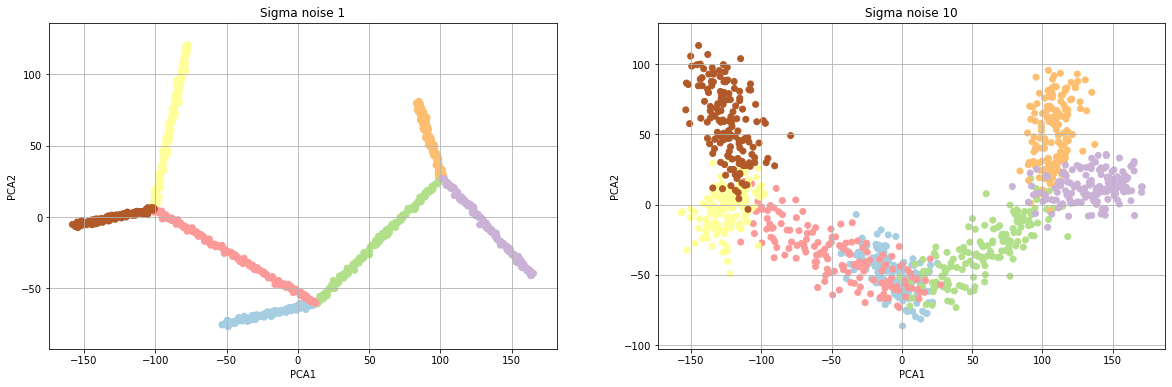

In [3]:
list_sigma_noise = [1, 10]
fig = plt.figure(figsize=(20, 6))
n_subplots_x = len( list_sigma_noise  )
c = 0


for sigma_noise in list_sigma_noise:
    c+=1; fig.add_subplot(1, n_subplots_x , c) 
    data = make_multi_level_fork(sigma_noise = sigma_noise, len_tooth=150, n_components = 20, n_levels_of_branching = 3,
                                      inertia_coef = 0, step_from_previous_branch = 0, plot_mode = 'PCA', return_X_y = False) # 'PCA'
    plt.title('Sigma noise '+str( sigma_noise ))

(600, 2) (600,)


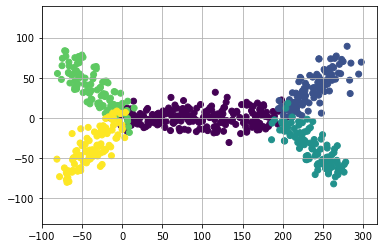

In [4]:
def make_dumbbell(n_layers = 1, n_features = 2,  sigma_noise = 10.0, n_samples4base = 200,
                  n_samples4branches = [100,100,100,100] , angles = [np.pi/4,-np.pi/4,3*np.pi/4,-3*np.pi/4] ):
  '''
  '''

  """
  n_layers = 2
  n_features = 2
  sigma_noise = 10.0
  plot_mode = 'PCA'
  n_samples4base = 200
  n_samples4branches = [100,100,100,100]
  angles = [np.pi/4,-np.pi/4,3*np.pi/4,-3*np.pi/4]
  """

  X_noiseless = np.zeros( (0,n_features))
  y_final = np.zeros( 0 )
  for layer in range(n_layers):
    current_label = 0 
    X = np.zeros( (n_samples4base, n_features) )
    X[:,0] = np.arange(n_samples4base)
    y = current_label * np.ones( n_samples4base )
    v_last_base_point_save = X[-1,:].copy()
    v_first_base_point_save = X[0,:].copy()

    # Make branches
    n_branches = len ( n_samples4branches )
    for c_branch in range( n_branches ) : # n_branches
      n_sample4branch = n_samples4branches[c_branch]
      current_label += 1
      y_branch = current_label * np.ones( n_sample4branch )
      angle = angles[c_branch] 
      if c_branch < n_branches/ 2:
        v_initial = v_last_base_point_save
      else:
        v_initial = v_first_base_point_save  
      X_branch = np.zeros( (n_sample4branch,  n_features)  ) #  [:2] = (np.cos(angle), np.sin(angle) )  
      v_direction = np.zeros( n_features)
      v_direction[0] = np.cos(angle)
      v_direction[1] = np.sin(angle)
      X_branch += v_direction # Broadcast vector to the whole array over axis 0 
      X_branch *= np.arange( 1, X_branch.shape[0] +1 ).reshape(X_branch.shape[0], 1 ) # Broadcast - mutiply each column by  by column = 1,2,3, ... 
      X_branch += v_initial # 
      X = np.concatenate( (X,X_branch) , axis = 0 )
      y = np.concatenate( (y, y_branch ))
    X_noiseless = np.concatenate( (X_noiseless,X) , axis = 0 )
    y_final = np.concatenate( (y_final,y) ) 
    
  X_noisy = X_noiseless + sigma_noise * np.random.randn( X_noiseless.shape[0], X_noiseless.shape[1] )


  y = y_final
  X = X_noisy

  if 0:
    print(X.shape, y.shape)
    r = X_noisy
    plt.scatter(r[:,0],r[:,1], c =y)
    plt.show()
  
  return X,y

X,y = make_dumbbell(n_layers = 1, n_features = 2,  sigma_noise = 10.0, n_samples4base = 200,
                  n_samples4branches = [100,100,100,100] , angles = [np.pi/4,-np.pi/4,3*np.pi/4,-3*np.pi/4] )
if 1:
  print(X.shape, y.shape)
  r = X
  plt.scatter(r[:,0],r[:,1], c =y)
  plt.axis("equal")
  plt.grid()
  plt.show()
